In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [110]:
data = pd.read_csv("drug200.csv")

In [111]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [112]:
dataset = data.values
dataset

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 'DrugY'],
       [47, 'M', 'LOW', 'HIGH', 13.093, 'drugC'],
       [47, 'M', 'LOW', 'HIGH', 10.114, 'drugC'],
       ...,
       [52, 'M', 'NORMAL', 'HIGH', 9.894, 'drugX'],
       [23, 'M', 'NORMAL', 'NORMAL', 14.02, 'drugX'],
       [40, 'F', 'LOW', 'NORMAL', 11.349, 'drugX']], dtype=object)

In [113]:
X = dataset[:, :-1]
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

In [114]:
Y = dataset[:, -1]
Y

array(['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugA', 'drugC', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX', 'DrugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA', 'DrugY',
       'drugX', 'drugB', 'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'Dru

In [115]:
X = X.astype(str)

In [116]:
X[0], Y[0]

(array(['23', 'F', 'HIGH', 'HIGH', '25.355'], dtype='<U6'), 'DrugY')

In [117]:
X_new = pd.DataFrame(X)
y_new = pd.DataFrame(Y)

In [118]:
X_new

,0,1,2,3,4
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.02


In [119]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       200 non-null    object
 1   1       200 non-null    object
 2   2       200 non-null    object
 3   3       200 non-null    object
 4   4       200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


In [120]:
X_new = X_new.drop([0, 4], axis=1)
X_new

,1,2,3
0,F,HIGH,HIGH
1,M,LOW,HIGH
2,M,LOW,HIGH
3,F,NORMAL,HIGH
4,F,LOW,HIGH
...,...,...,...
195,F,LOW,HIGH
196,M,LOW,HIGH
197,M,NORMAL,HIGH
198,M,NORMAL,NORMAL


### Splitting the data

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

In [129]:
print(f"The Train shape of X : {X_train.shape} and y: {y_train.shape}")
print(f"The Test shape of X: {X_test.shape} and y: {y_test.shape}")

The Train shape of X : (134, 3) and y: (134, 1)
The Test shape of X: (66, 3) and y: (66, 1)


In [130]:
def prepare_inputs(X_train, X_test):
    ordinal_encoder = OrdinalEncoder()
    ordinal_encoder.fit(X_train)
    X_train_enc = ordinal_encoder.transform(X_train)
    X_test_enc = ordinal_encoder.transform(X_test)
    return X_train_enc, X_test_enc

In [131]:
def prepare_target(y_train, y_test):
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    y_train_enc = label_encoder.transform(y_train)
    y_test_enc = label_encoder.transform(y_test)
    return y_train_enc, y_test_enc

In [132]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [133]:
y_train_enc, y_test_enc = prepare_inputs(y_train, y_test)

## Chi Squared Feature Selection

In [135]:
def select_features(X_train, Y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [137]:
X_train_fs, X_test_fs, fs=select_features(X_train_enc, y_train_enc, X_test_enc)

In [138]:
fs.scores_

array([ 2.31314311, 47.98624311,  5.89741885])

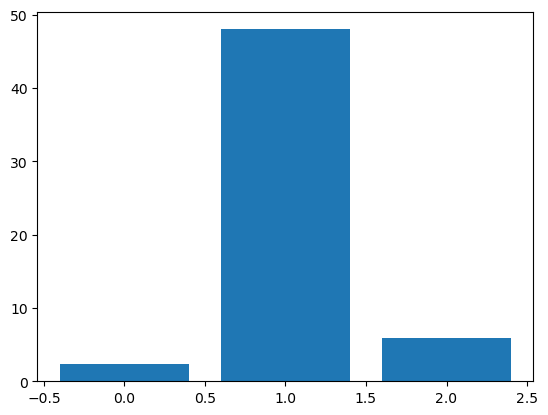

In [141]:
plt.bar([i for i in range (len(fs.scores_))],fs.scores_)
plt.show()

## Mutual Information feature Selection

In [144]:
def select_features_2(X_train, Y_train, X_test):
    fs=SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, Y_train)
    X_train_fs_2=fs.transform(X_train)
    X_test_fs_2=fs.transform(X_test)
    return X_train_fs_2, X_test_fs_2, fs

In [146]:
X_train_fs_2, X_test_fs_2, fs=select_features_2(X_train_enc, y_train_enc, X_test_enc)

/Users/selva/enter/envs/torch/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
fs.scores_

array([0.        , 0.35630001, 0.02907744])

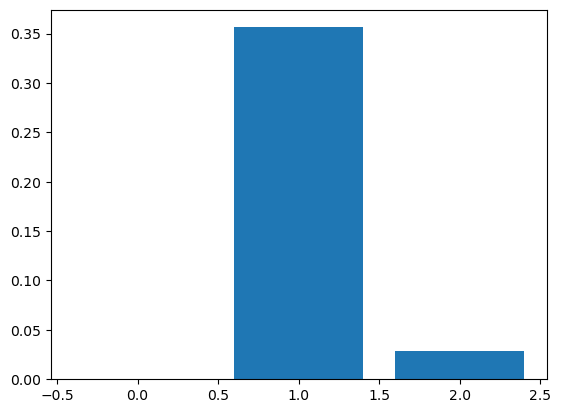

In [148]:
plt.bar([i for i in range (len(fs.scores_))],fs.scores_)
plt.show()

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [150]:
model=LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, l1_ratio=None, max_iter=100,
multi_class='auto', n_jobs=None, penalty='l2',
 random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
warm_start=False)
#predict the model
yhat=model.predict(X_test_enc)
#Evaluate the prediction
accuracy=accuracy_score(y_test_enc, yhat)
print("Accuracy: %.2f" %(accuracy*100))

Accuracy: 53.03


/Users/selva/enter/envs/torch/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model using Chi-Squared Features

In [152]:
model1=LogisticRegression(solver='lbfgs')

#fit the model
model1.fit(X_train_fs, y_train_enc)

#evaluate the model
yhat=model1.predict(X_test_fs)

#evaluate the performance
accuracy=accuracy_score(y_test_enc,yhat)
print("Accuracy: %.2f" %(accuracy*100))

Accuracy: 53.03


/Users/selva/enter/envs/torch/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model using Mutual Information

In [154]:
model2=LogisticRegression(solver='lbfgs')

#fit the model
model2.fit(X_train_fs_2, y_train_enc)

#evaluate the model
yhat=model2.predict(X_test_fs_2)

#evaluate the performance
accuracy=accuracy_score(y_test_enc,yhat)
print("Accuracy: %.2f" %(accuracy*100))

Accuracy: 53.03


/Users/selva/enter/envs/torch/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
